In [ ]:
import warnings
warnings.filterwarnings('ignore')

#1. **Data Loading**

In [ ]:
from google.colab import files
import zipfile, os

uploaded = files.upload()

# Extract
zip_path = next(iter(uploaded))
extract_path = '/content/heart_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))

Saving heart_failure_prediction.zip to heart_failure_prediction.zip
Extracted files: ['heart.csv']


In [ ]:
import pandas as pd

df = pd.read_csv("heart_failure_prediction.zip")
print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#**2. Data Exploration**

In [ ]:
# Dataset shape and info
print("Shape:", df.shape)
df.describe()
df.info()

Shape: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
# Counting Missing and Duplicate Values
print("\n Missing Values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


 Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Duplicate rows: 0


#**3. Distribution of target (Heart Disease)**

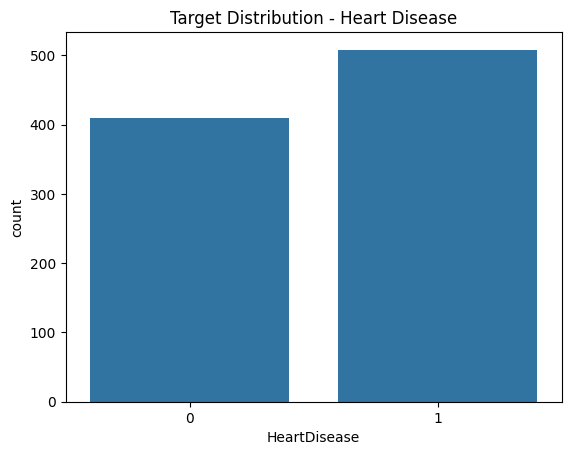

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# At x-axis, 0 - No heart disease and 1 - Has heart disease
# y-axis is the count of patients in each class

# Histogram
sns.countplot(x='HeartDisease', data=df)
plt.title("Target Distribution - Heart Disease")
plt.show()

#**4. Data Cleaning and EDA**

#**Univariate Analysis**

**A. Numerical Features**



*   Histogram plot for numerical **Feature Distribution plot**:



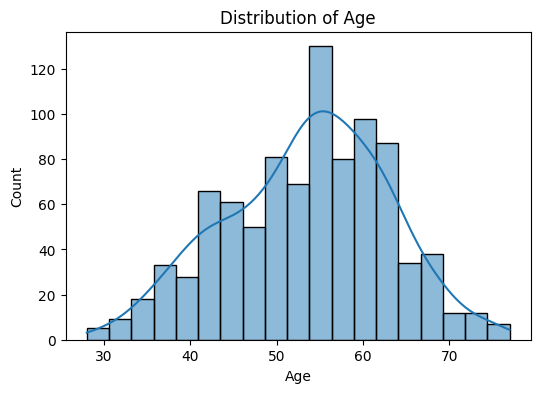

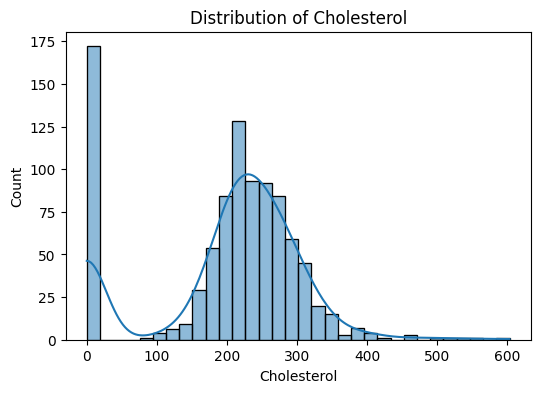

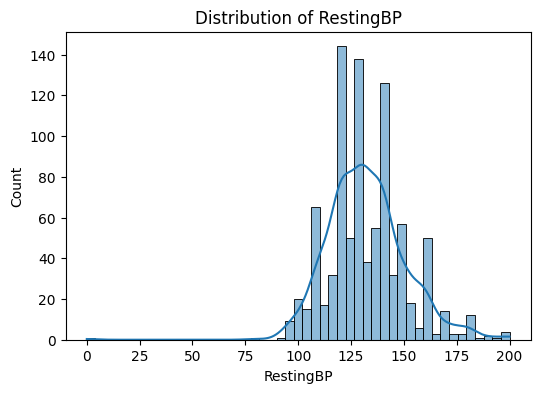

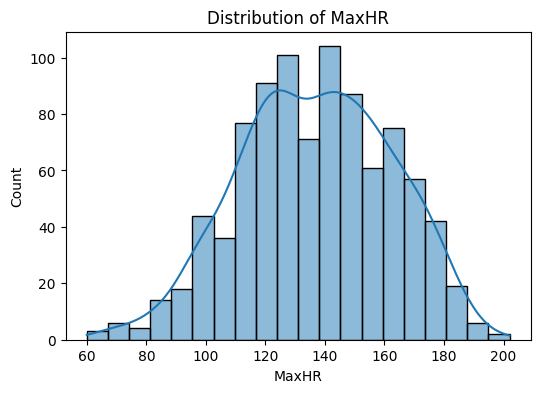

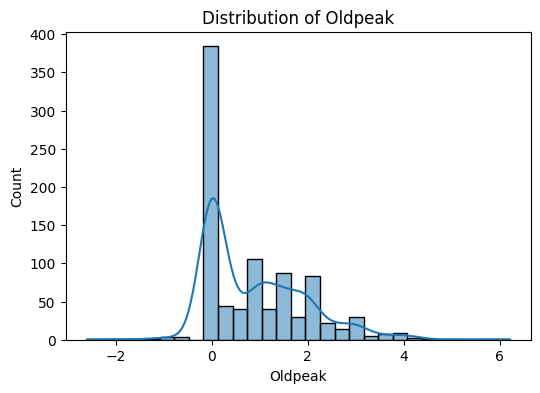

In [ ]:
numerical_cols = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

*   Numerical Feature Distribution by Target Class

    To gain insights into the distribution of numeric features between patients with and without heart disease, histograms colored by the target variable (HeartDisease) are created.

    These visualizations help us identify strong predictors by illustrating how
    distinctly the two classes are separated. Features with clear separation can significantly enhance our predictive models for heart disease.




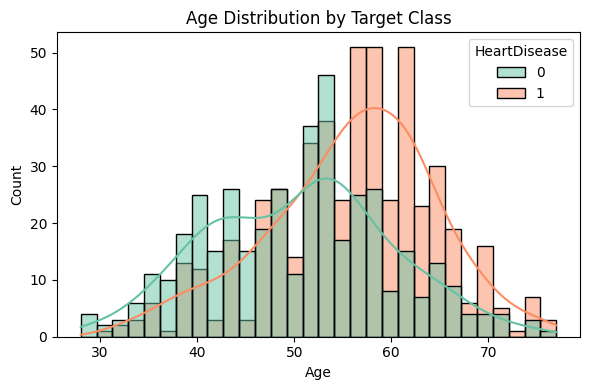

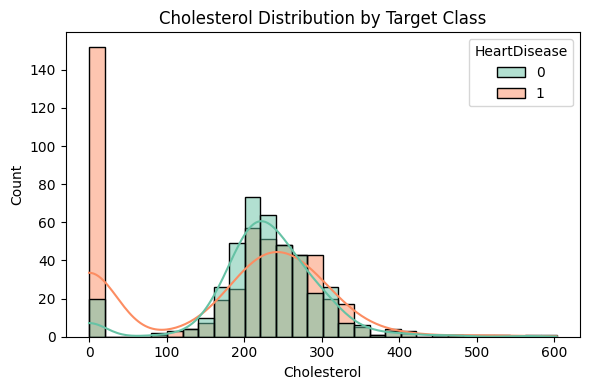

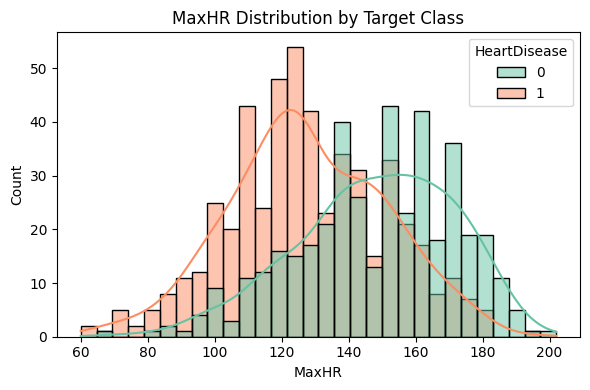

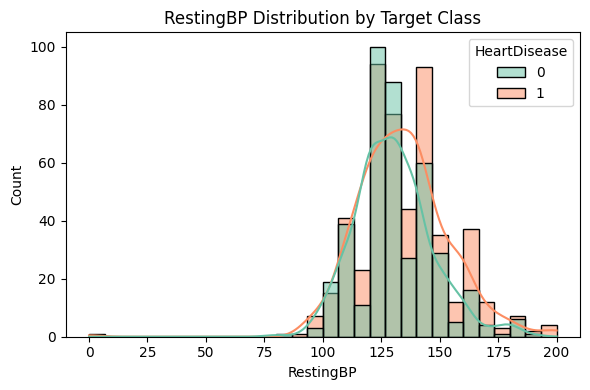

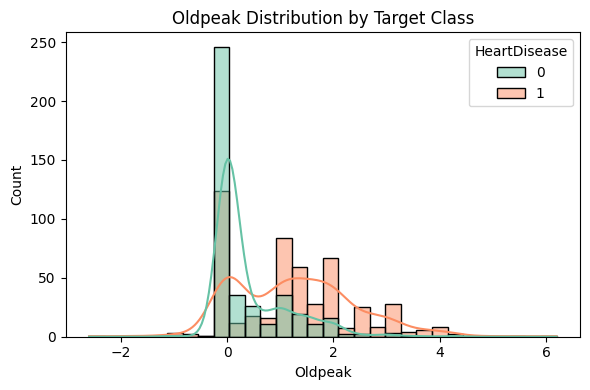

In [ ]:
features = ['Age', 'Cholesterol', 'MaxHR', 'RestingBP', 'Oldpeak']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='HeartDisease',kde=True, bins=30, palette='Set2')
    plt.title(f'{feature} Distribution by Target Class')
    plt.tight_layout()
    plt.show()

# Visualizing Outliers with Boxplots

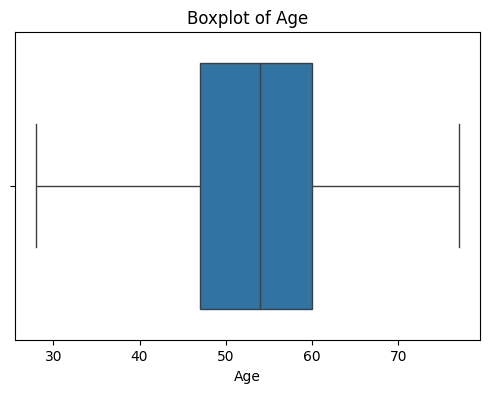

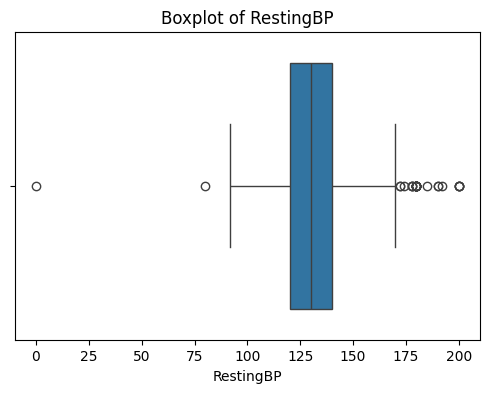

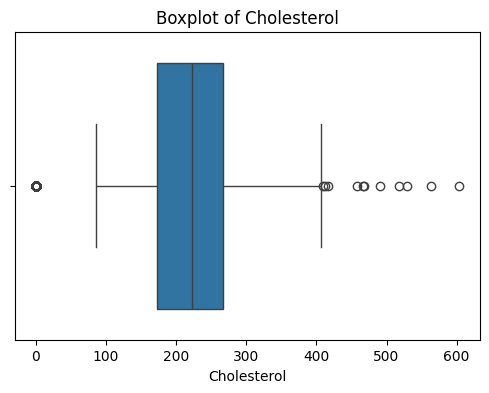

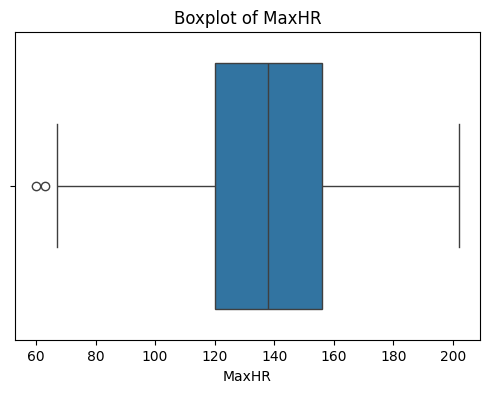

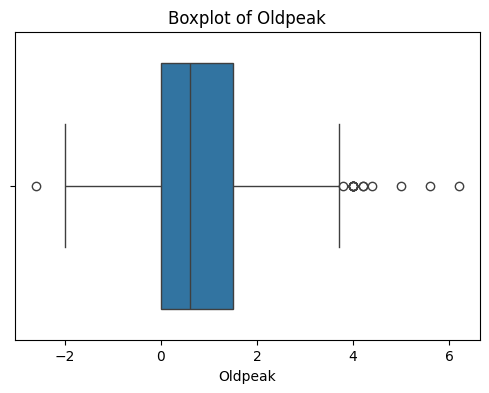

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



**B. Categorical Features**



*   Count Plot for categorical features by Target Class(Heart Disease).

    The inferance that could be made looking at the Count plot is as follows:
1. Sex vs Heart Disease ▶ Males seem to be at higher risk for to heart disease than females.
2. Chest Pain Type vs Heart Disease ▶ ASY (Asymptomatic Chest pain) is a strong indicator for heart disease.

3. Resting ECG vs Heart Disease ▶ ST and LVH (Left Ventricular Hypertrophy)may suggest Heart disease.
4. Exercise Angina vs Heart Disease ▶ Experincing Excercise induced Angina is a strong indicator for Heart Disease.
5. ST Slope vs Heart Disease ▶ A Flat or Downward slopes are imp sign for higher Heart disease risk.











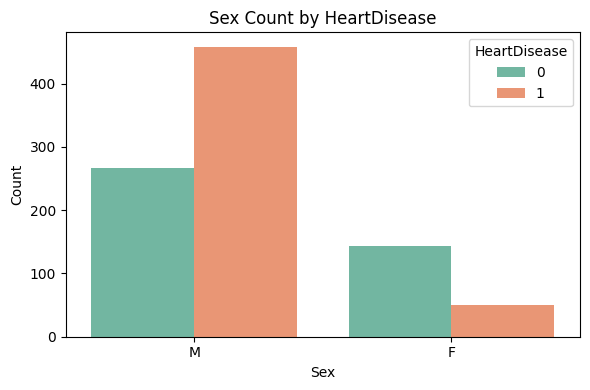

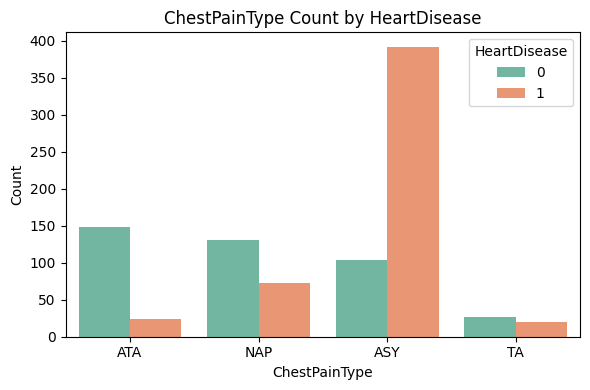

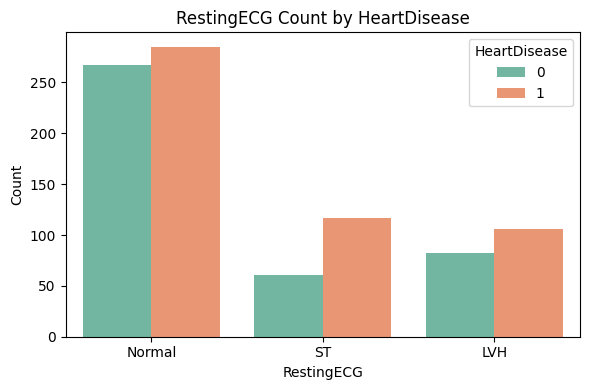

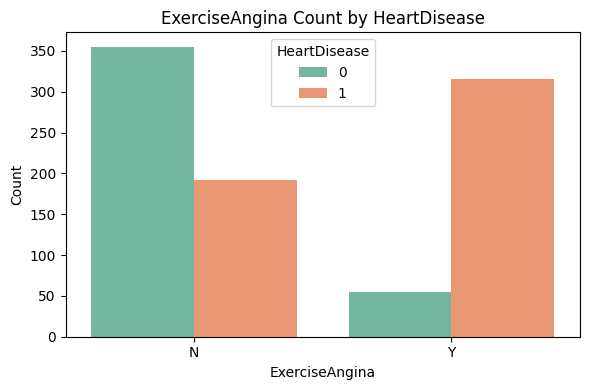

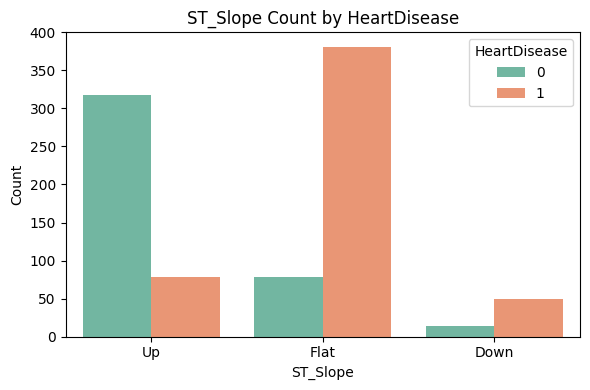

In [ ]:
categorical_cols = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']

for feature in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='HeartDisease', palette='Set2')
    plt.title(f'{feature} Count by HeartDisease')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Although FastingBS is stored as a numeric feature (0 or 1), it represents two distinct categories:
*   0: Fasting blood sugar ≤ 120 mg/dl
*   1: Fasting blood sugar > 120 mg/dl      
Therefore, visualizing it using a categorical plot (countplot) for better interpretation.   

**Fasting BS vs Heart Disease** ▶ Elevated Fasting Blood Sugar level (> 120mg/dl -Yes) may be associated with greater risk to heart disease.   


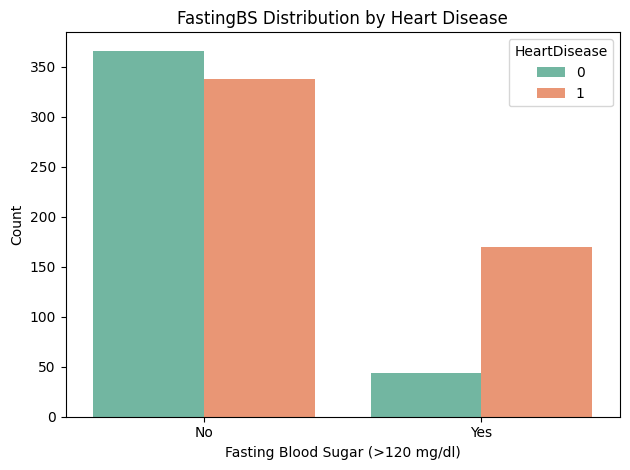

In [ ]:
sns.countplot(data=df, x='FastingBS', hue='HeartDisease', palette='Set2')
plt.title('FastingBS Distribution by Heart Disease')
plt.xlabel('Fasting Blood Sugar (>120 mg/dl)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

**Chi-square Test**   
Features with **`p-value < 0.05`** are statistically significantly associated with HeartDisease.
- These results support including these features in the model.
- Features with high p-values might be dropped or deprioritized if model performance is a concern.


In [ ]:
from scipy.stats import chi2_contingency

categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print("Chi-Square Test Results:\n")
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")


Chi-Square Test Results:

Sex: p-value = 0.0000 (Significant)
ChestPainType: p-value = 0.0000 (Significant)
FastingBS: p-value = 0.0000 (Significant)
RestingECG: p-value = 0.0042 (Significant)
ExerciseAngina: p-value = 0.0000 (Significant)
ST_Slope: p-value = 0.0000 (Significant)


Keeping original data copy to use df_original for training baseline models and df (after capping) for post-processing comparison.

In [ ]:
# Keep original data (before replacing 0 or capping)
df_original = df.copy(deep=True)

**Handling Zeros in Cholestrol and Resting BP**

In our dataset, some entries for Cholesterol and Resting BP are incorrectly recorded as **0**, which is biologically not possible and indicates potential data gaps.

To maintain data integrity,  **0** values were replaced with the **median** of the valid non-zero entries for each column. The use of the median(unlike mean), ensures robustness against outliers and preserves the true central tendency of the data.

In [ ]:
print("Cholesterol values = 0:", (df['Cholesterol'] == 0).sum())
print("RestingBP values = 0:", (df['RestingBP'] == 0).sum())

Cholesterol values = 0: 172
RestingBP values = 0: 1


In [ ]:
# Replacing 0 with median of non-zero values.
import numpy as np
df['Cholesterol'] = np.where(df['Cholesterol'] == 0, df[df['Cholesterol'] > 0]['Cholesterol'].median(), df['Cholesterol'])
df['RestingBP'] = np.where(df['RestingBP'] == 0, df[df['RestingBP'] > 0]['RestingBP'].median(), df['RestingBP'])

In [ ]:
print("New Cholesterol values = 0:", (df['Cholesterol'] == 0).sum())
print("New RestingBP values = 0:", (df['RestingBP'] == 0).sum())

New Cholesterol values = 0: 0
New RestingBP values = 0: 0


In [ ]:
print("Original Cholesterol values = 0:", (df_original['Cholesterol'] == 0).sum())
print("Original RestingBP values = 0:", (df_original['RestingBP'] == 0).sum())

Original Cholesterol values = 0: 172
Original RestingBP values = 0: 1


**Counting Outliers with IQR Method without any modifications**

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
RestingBP: 27 outliers
Cholesterol: 41 outliers
MaxHR: 2 outliers
Oldpeak: 16 outliers


*   Handling Outliers in Cholestrol and Resting BP

In [ ]:
# Calculate percentile-based capping bounds of Cholestrol, Resting BP and OldPeak for outlier capping
def cap_outliers_percentile(df, col, lower_per=0.01, upper_per=0.99):
    lower_bound = df[col].quantile(lower_per)
    upper_bound = df[col].quantile(upper_per)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

In [ ]:
# Applying capping:
df = cap_outliers_percentile(df, 'Cholesterol')
df = cap_outliers_percentile(df, 'RestingBP')
df = cap_outliers_percentile(df, 'Oldpeak')

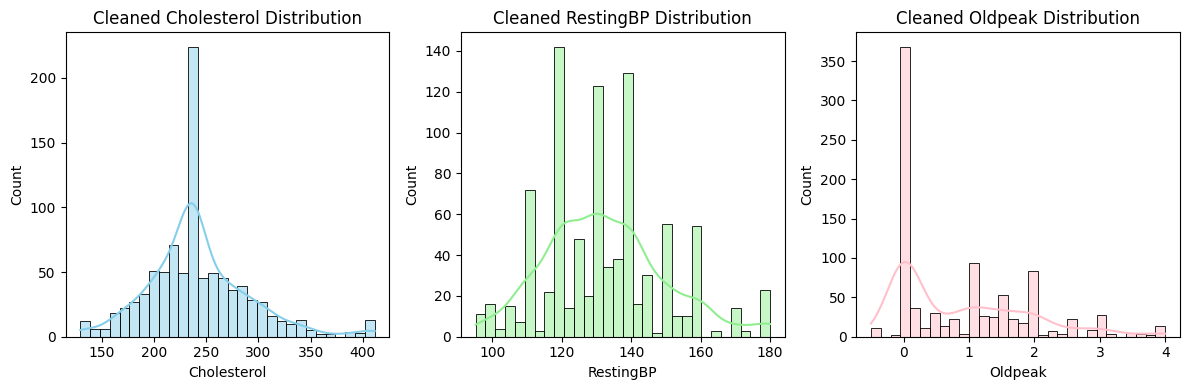

In [ ]:
# Plot after handling outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Cholesterol'], bins=30, kde=True, color='skyblue')
plt.title('Cleaned Cholesterol Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['RestingBP'], bins=30, kde=True, color='lightgreen')
plt.title('Cleaned RestingBP Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Oldpeak'], bins=30, kde=True, color='pink')
plt.title('Cleaned Oldpeak Distribution')

plt.tight_layout()
plt.show()



In [ ]:
print((df['Cholesterol'] != df_original['Cholesterol']).sum())

192


In [ ]:
print("Max Cholesterol after capping:", df['Cholesterol'].max())

Max Cholesterol after capping: 411.4900000000001


#**5. Data Preprocessing**


**5.2 Encoding categorical features :**

- Applied **`Label Encoding`** to binary categorical variables: `Sex`, `ExerciseAngina`, `FastingBS`(already binary) and,
- **`One-Hot Encoding`** for multi-category variables: `ChestPainType`, `RestingECG`, `ST_Slope`
to both the df (capping) and df_original(before capping)
- Used `drop_first=True` in one-hot encoding to prevent multicollinearity.

In [ ]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
df['Sex'].unique()
df['ExerciseAngina'].unique()
df['FastingBS'].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Binary encoding
df_original['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df_original['ExerciseAngina'] = LabelEncoder().fit_transform(df['ExerciseAngina'])
df_original['FastingBS'] = LabelEncoder().fit_transform(df['FastingBS'])

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['ExerciseAngina'] = LabelEncoder().fit_transform(df['ExerciseAngina'])
df['FastingBS'] = LabelEncoder().fit_transform(df['FastingBS'])

# One-hot encode multi-category variables
multi_cat_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df_encoded_uncapped = pd.get_dummies(df_original, columns=multi_cat_cols, drop_first=True)
df_encoded_capped = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print("Encoded DataFrame shape:", df_encoded_uncapped.shape)
df_encoded_uncapped.head()

Encoded DataFrame shape: (918, 16)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


Scaling: Min-Max Scaling was applied to normalize numerical features to a 0–1 range. This is essential for algorithms like Logistic Regression, SVM, and KNN to ensure balanced and efficient learning.

**5.2  Train and Test data splitting:**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X_uncapped = df_encoded_uncapped.drop('HeartDisease', axis=1)
y_uncapped = df_encoded_uncapped['HeartDisease']

X_capped = df_encoded_capped.drop('HeartDisease', axis=1)
y_capped = df_encoded_capped['HeartDisease']

# Train-Test Split
X_train_uncapped, X_test_uncapped, y_train_uncapped, y_test_uncapped = train_test_split(
    X_uncapped, y_uncapped, test_size=0.2, random_state=42, stratify=y_uncapped)

X_train_capped, X_test_capped, y_train_capped, y_test_capped = train_test_split(
    X_capped, y_capped, test_size=0.2, random_state=42, stratify=y_capped)

print("Training samples:", X_train_uncapped.shape)
print("Testing samples:", X_test_uncapped.shape)

Training samples: (734, 15)
Testing samples: (184, 15)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Uncapped data

scaler_uncapped = MinMaxScaler()
X_train_unc_scaled = scaler_uncapped.fit_transform(X_train_uncapped)
X_test_unc_scaled = scaler_uncapped.transform(X_test_uncapped)

# Capped data

scaler_capped = MinMaxScaler()
X_train_cap_scaled = scaler_capped.fit_transform(X_train_capped)
X_test_cap_scaled = scaler_capped.transform(X_test_capped)


#**6. Modeling**

**A. Base Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),

    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

In [ ]:
def train_evaluate (base_models, X_train, y_train, X_test, y_test):
  results = []
  for name, base_model in base_models.items():
    base_model.fit(X_train, y_train)
    y_train_pred = base_model.predict(X_train)
    y_test_pred = base_model.predict(X_test)

    precision_train = precision_score (y_train, y_train_pred)
    recall_train = recall_score (y_train, y_train_pred)
    f1_train = f1_score (y_train, y_train_pred)

    precision_test = precision_score (y_test, y_test_pred)
    recall_test = recall_score ( y_test, y_test_pred)
    f1_test = f1_score (y_test, y_test_pred)


    results.append( {
    "Model": name,
    "Train_Precision": precision_train,
    "Train_Recall" : recall_train,
    "Train_F1": f1_train,

    "Test_Precision": precision_test,
    "Test_Recall" : recall_test,
    "Test_F1": f1_test
    })

  return pd.DataFrame(results)

In [ ]:
# Evaluate uncapped data
results_uncapped = train_evaluate(base_models, X_train_unc_scaled, y_train_uncapped, X_test_unc_scaled, y_test_uncapped)
results_uncapped['Data'] = 'Uncapped'

# Evaluate capped data
results_capped = train_evaluate(base_models, X_train_cap_scaled, y_train_capped, X_test_cap_scaled, y_test_capped)
results_capped['Data'] = 'Capped'

# Combine results
results_df= pd.concat([results_uncapped, results_capped], ignore_index=True)
results_df

,Model,Train_Precision,Train_Recall,Train_F1,Test_Precision,Test_Recall,Test_F1,Data
0,Logistic Regression,0.861905,0.891626,0.876513,0.879630,0.931373,0.904762,Uncapped
1,SVM,0.880668,0.908867,0.894545,0.862385,0.921569,0.890995,Uncapped
2,KNN,0.874419,0.926108,0.899522,0.876190,0.901961,0.888889,Uncapped
3,Logistic Regression,0.865707,0.889163,0.877278,0.886792,0.921569,0.903846,Capped
4,SVM,0.879433,0.916256,0.897467,0.861111,0.911765,0.885714,Capped
5,KNN,0.868966,0.931034,0.898930,0.878505,0.921569,0.899522,Capped


#**B. Hyperparameter Tuning using GridSearchCV**

In [ ]:
# Label encode binary variables
from sklearn.preprocessing import LabelEncoder

bi_cols = ['Sex', 'ExerciseAngina']
le = LabelEncoder()
for col in bi_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode multi-category variables
multi_cat_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print("Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head()

Encoded DataFrame shape: (918, 16)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (734, 15)
Testing samples: (184, 15)


In [ ]:
# # Features Scaling:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# List to store results
model_results = []

In [ ]:
# Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

# Grid Search with cross-validation
lr_grid = GridSearchCV(estimator=lr_model, param_grid=hyperparameters, cv=5, scoring='f1')

lr_grid.fit(X_train, y_train)

best_lr = lr_grid.best_estimator_
print("Best Parameters:", lr_grid.best_params_)

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}


In [ ]:
# Predict
lr_train_pred = best_lr.predict(X_train)
lr_test_pred = best_lr.predict(X_test)

In [ ]:
# Evaluation
results = {
    "Model": "LR",
    "Train Accuracy": accuracy_score(y_train, lr_train_pred),
    "Train Precision": precision_score(y_train, lr_train_pred),
    "Train Recall": recall_score(y_train, lr_train_pred),
    "Train F1": f1_score(y_train, lr_train_pred),
    "Test Accuracy": accuracy_score(y_test, lr_test_pred),
    "Test Precision": precision_score(y_test, lr_test_pred),
    "Test Recall": recall_score(y_test, lr_test_pred),
    "Test F1": f1_score(y_test, lr_test_pred)
}

model_results.append(results)

# Print metrics
print("\nLR - Training Metrics")
print(f"Train Accuracy: {results['Train Accuracy']:.4f}")
print(f"Train Precision: {results['Train Precision']:.4f}")
print(f"Train Recall: {results['Train Recall']:.4f}")
print(f"Train F1 Score: {results['Train F1']:.4f}")

print("\nLR - Test Metrics")
print(f"Test Accuracy: {results['Test Accuracy']:.4f}")
print(f"Test Precision: {results['Test Precision']:.4f}")
print(f"Test Recall: {results['Test Recall']:.4f}")
print(f"Test F1 Score: {results['Test F1']:.4f}")


LR - Training Metrics
Train Accuracy: 0.8597
Train Precision: 0.8582
Train Recall: 0.8941
Train F1 Score: 0.8758

LR - Test Metrics
Test Accuracy: 0.8696
Test Precision: 0.8750
Test Recall: 0.8922
Test F1 Score: 0.8835


In [ ]:
#  3. Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)

svm_params =  {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# GridSearchCV
grid_svm = GridSearchCV(svm_model, svm_params, cv=5, scoring='f1')
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
print("Best SVM Params:", grid_svm.best_params_)

Best SVM Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Predict
svm_train_pred = best_svm.predict(X_train)
svm_test_pred = best_svm.predict(X_test)

# Evaluation
results = {
    "Model": "SVM",
    "Train Accuracy": accuracy_score(y_train, svm_train_pred),
    "Train Precision": precision_score(y_train, svm_train_pred),
    "Train Recall": recall_score(y_train, svm_train_pred),
    "Train F1": f1_score(y_train, svm_train_pred),
    "Test Accuracy": accuracy_score(y_test, svm_test_pred),
    "Test Precision": precision_score(y_test, svm_test_pred),
    "Test Recall": recall_score(y_test, svm_test_pred),
    "Test F1": f1_score(y_test, svm_test_pred)
}

model_results.append(results)

# Print metrics
print("\nSVM - Training Metrics")
print(f"Train Accuracy: {results['Train Accuracy']:.4f}")
print(f"Train Precision: {results['Train Precision']:.4f}")
print(f"Train Recall: {results['Train Recall']:.4f}")
print(f"Train F1 Score: {results['Train F1']:.4f}")

print("\nSVM - Test Metrics")
print(f"Test Accuracy: {results['Test Accuracy']:.4f}")
print(f"Test Precision: {results['Test Precision']:.4f}")
print(f"Test Recall: {results['Test Recall']:.4f}")
print(f"Test F1 Score: {results['Test F1']:.4f}")


SVM - Training Metrics
Train Accuracy: 0.8787
Train Precision: 0.8712
Train Recall: 0.9163
Train F1 Score: 0.8932

SVM - Test Metrics
Test Accuracy: 0.8750
Test Precision: 0.8624
Test Recall: 0.9216
Test F1 Score: 0.8910


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_params = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2],
    'metric' : ['manhattan', 'euclidean']
}

grid_knn = GridSearchCV(knn_model, knn_params, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
print("Best KNN param: ", grid_knn.best_params_)

Best KNN param:  {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [ ]:
# Predict
knn_train_pred = best_knn.predict(X_train)
knn_test_pred = best_knn.predict(X_test)

# Evaluation
results = {
    "Model": "KNN",
    "Train Accuracy": accuracy_score(y_train, knn_train_pred),
    "Train Precision": precision_score(y_train, knn_train_pred),
    "Train Recall": recall_score(y_train, knn_train_pred),
    "Train F1": f1_score(y_train, knn_train_pred),
    "Test Accuracy": accuracy_score(y_test, knn_test_pred),
    "Test Precision": precision_score(y_test, knn_test_pred),
    "Test Recall": recall_score(y_test, knn_test_pred),
    "Test F1": f1_score(y_test, knn_test_pred)
}

model_results.append(results)

# Print metrics
print("\nKNN - Training Metrics")
print(f"Train Accuracy: {results['Train Accuracy']:.4f}")
print(f"Train Precision: {results['Train Precision']:.4f}")
print(f"Train Recall: {results['Train Recall']:.4f}")
print(f"Train F1 Score: {results['Train F1']:.4f}")

print("\nKNN - Test Metrics")
print(f"Test Accuracy: {results['Test Accuracy']:.4f}")
print(f"Test Precision: {results['Test Precision']:.4f}")
print(f"Test Recall: {results['Test Recall']:.4f}")
print(f"Test F1 Score: {results['Test F1']:.4f}")


KNN - Training Metrics
Train Accuracy: 0.8842
Train Precision: 0.8690
Train Recall: 0.9310
Train F1 Score: 0.8989

KNN - Test Metrics
Test Accuracy: 0.8859
Test Precision: 0.8785
Test Recall: 0.9216
Test F1 Score: 0.8995


# To find the best model overall (after tuning)


In [ ]:
# Convert list of dicts to DataFrame
print(f"Number of models recorded: {len(model_results)}")
results_df = pd.DataFrame(model_results)
print(results_df)

Number of models recorded: 3
  Model  Train Accuracy  Train Precision  Train Recall  Train F1  \
0    LR        0.859673         0.858156      0.894089  0.875754   
1   SVM        0.878747         0.871194      0.916256  0.893157   
2   KNN        0.884196         0.868966      0.931034  0.898930   

   Test Accuracy  Test Precision  Test Recall   Test F1  
0       0.869565        0.875000     0.892157  0.883495  
1       0.875000        0.862385     0.921569  0.890995  
2       0.885870        0.878505     0.921569  0.899522  


In [ ]:
#result
sorted_df = results_df.sort_values(by='Test F1', ascending=False)

In [ ]:
# Full Comparison
print("\nModel Comparison Table:")
print(sorted_df.reset_index(drop=True))


Model Comparison Table:
  Model  Train Accuracy  Train Precision  Train Recall  Train F1  \
0   KNN        0.884196         0.868966      0.931034  0.898930   
1   SVM        0.878747         0.871194      0.916256  0.893157   
2    LR        0.859673         0.858156      0.894089  0.875754   

   Test Accuracy  Test Precision  Test Recall   Test F1    F1_Gap  \
0       0.885870        0.878505     0.921569  0.899522  0.000592   
1       0.875000        0.862385     0.921569  0.890995  0.002162   
2       0.869565        0.875000     0.892157  0.883495  0.007741   

   Custom_Score  
0      0.898930  
1      0.888833  
2      0.875754  


In [ ]:
best_model_row = sorted_df.iloc[0]
print(f"\nBest Overall Model: {best_model_row['Model']}")
print(f"Test Accuracy: {best_model_row['Test Accuracy']:.4f}")
print(f"Test F1 Score: {best_model_row['Test F1']:.4f}")
print(f"Test Precision: {best_model_row['Test Precision']:.4f}")
print(f"Test Recall: {best_model_row['Test Recall']:.4f}")


Best Overall Model: KNN
Test Accuracy: 0.8859
Test F1 Score: 0.8995
Test Precision: 0.8785
Test Recall: 0.9216


**Confusion Matrices – Model Comparison (After Tuning)**

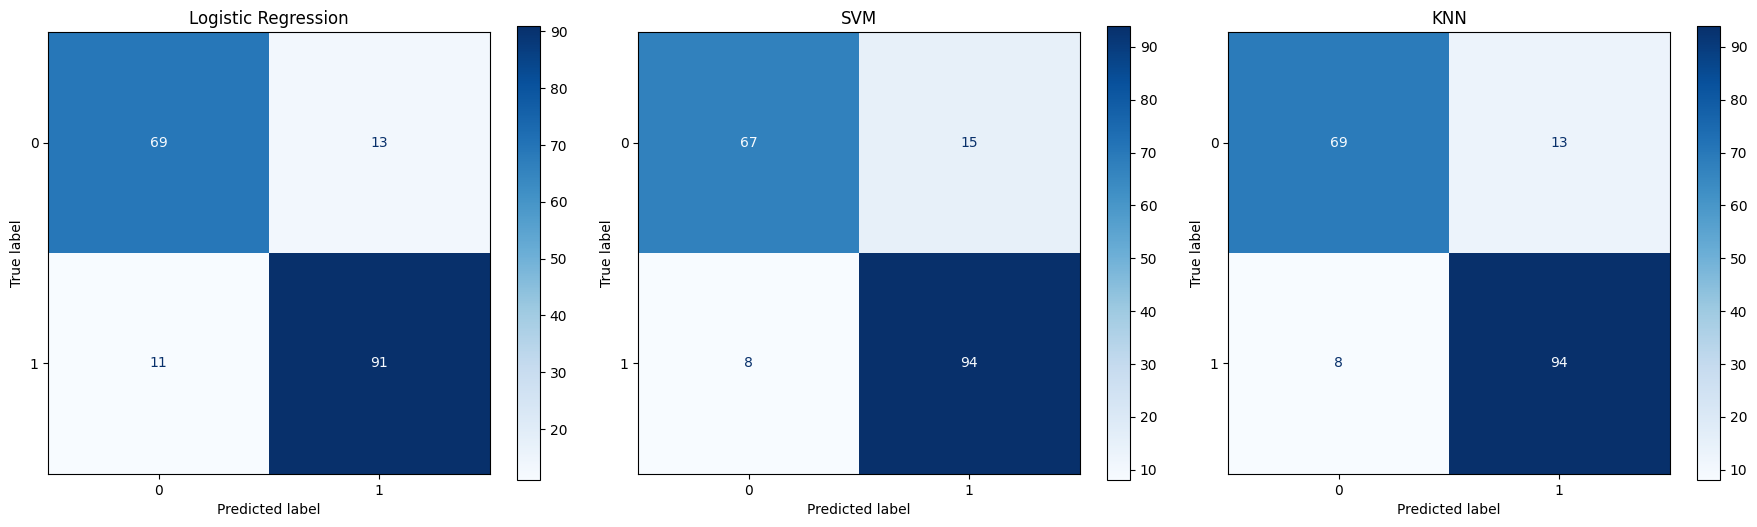

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {'Logistic Regression': best_lr, 'SVM': best_svm, 'KNN' : best_knn}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

**Model Comparision- Train and Test Data using Accuracy and F1 score Bar-graph**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melting the DataFrame to long format for grouped plotting
melted_df = pd.melt(                    # Reshapes DF from wide to long format
    sorted_df,
    id_vars='Model',                    # Coloumn as identifier
    value_vars=[                        # Columns to melt
        'Train Accuracy', 'Test Accuracy',
        'Train F1', 'Test F1'
    ],
    var_name='Metric Type',
    value_name='Score'
)

In [ ]:
# Creating two new columns: one for Metric, one for Dataset (Train/Test)
melted_df['Metric'] = melted_df['Metric Type'].apply(lambda x: x.split()[1])
melted_df['Dataset'] = melted_df['Metric Type'].apply(lambda x: x.split()[0])

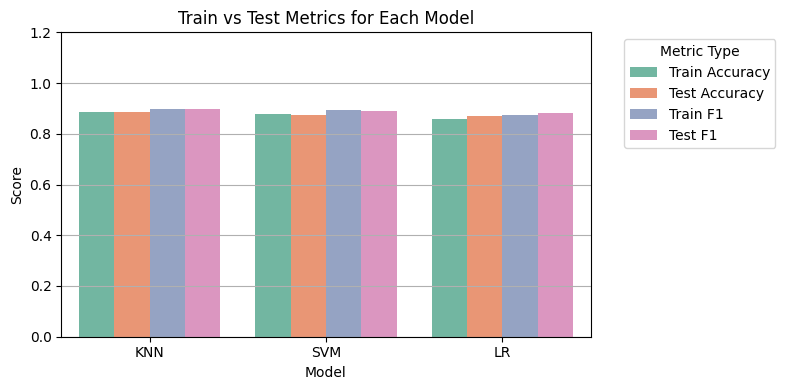

In [ ]:
# Ploting grouped bar graph
plt.figure(figsize=(8, 4))
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric Type', palette='Set2')

plt.title('Train vs Test Metrics for Each Model')
plt.ylabel('Score')
plt.ylim(0, 1.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metric Type')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#Interpretability for Best Model - Logistic Regression

A. Feature Importance – Coefficients

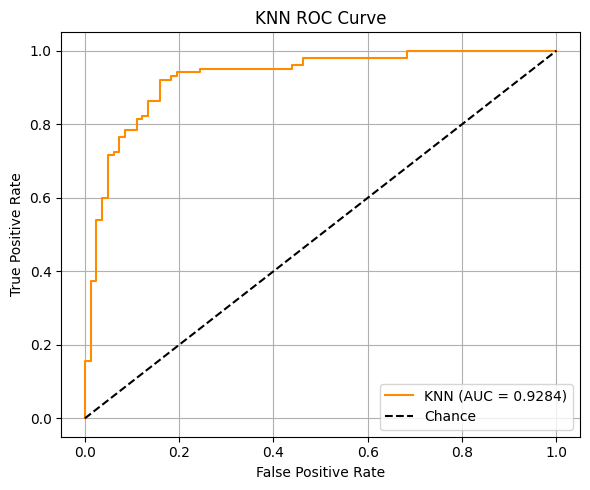

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities
knn_probs = best_knn.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, Lr_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

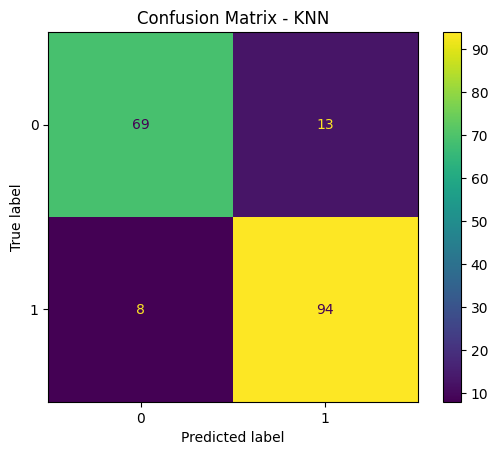

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr.classes_)
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()

In [ ]:
type(X_test)

numpy.ndarray

PermutationExplainer explainer: 101it [05:07,  3.14s/it]


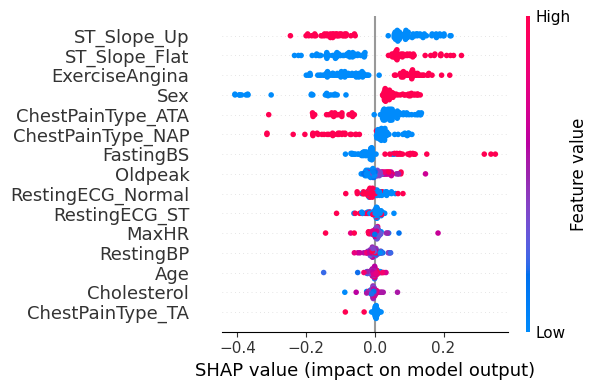

In [ ]:
import shap
# Coverting X_test into pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# SHAP explainer for SVM
explainer = shap.Explainer(best_knn.predict, X_train)

shap_values = explainer(X_test_df[:100])
shap.summary_plot(shap_values, X_test_df[:100], plot_size=(6, 4))